# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
import matplotlib.ticker as mtick

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator

In [2]:
plot_output_dir = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"

In [68]:
excel_path = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Manual\\input-data.xlsx"
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

##Users\Advait Lath\Documents\nimf-tracker-main\Manual

Files in 'c:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Manual': ['.DS_Store', 'COW', 'input-data 25-09 Pre.xlsx', 'input-data.xlsx', 'input-data1.xlsx', 'manual.ipynb', 'snapshot_graphs.xlsx']


# GST and eWay

In [4]:
gst = pd.read_excel(excel_path, sheet_name='gst-eway', index_col=0, parse_dates=True)

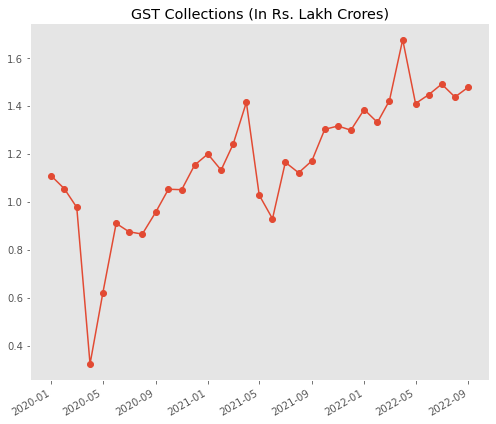

In [5]:
(gst['GST']/1000000).plot(marker='o', figsize=(7,6), x_compat=True)

plt.title("GST Collections (In Rs. Lakh Crores)")

#plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("")
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+"\\gst.png", dpi=300)


In [6]:
gst = gst/1000000
print(gst)

                e-Way      GST
2020-01-01        NaN  1.10818
2020-02-01  57.185697  1.05366
2020-03-01  40.658810  0.97597
2020-04-01   8.609447  0.32294
2020-05-01  25.492670  0.62009
2020-06-01  43.424869  0.90917
2020-07-01  48.366538  0.87422
2020-08-01  49.443806  0.86449
2020-09-01  57.439923  0.95480
2020-10-01  64.185116  1.05155
2020-11-01  57.722962  1.04963
2020-12-01  64.197352  1.15174
2021-01-01  62.875122  1.19847
2021-02-01  63.844401  1.13143
2021-03-01  65.612362  1.23902
2021-04-01  58.763624  1.41384
2021-05-01  39.979138  1.02709
2021-06-01  54.689215  0.92849
2021-07-01  64.164493  1.16393
2021-08-01  63.305179  1.12020
2021-09-01  67.940369  1.17010
2021-10-01  73.506895  1.30127
2021-11-01  61.151727  1.31526
2021-12-01  71.635048  1.29780
2022-01-01  68.842785  1.38394
2022-02-01  66.055997  1.33026
2022-03-01  78.164259  1.42095
2022-04-01  75.244863  1.67540
2022-05-01  73.616775  1.40885
2022-06-01  74.479039  1.44616
2022-07-01  75.579604  1.48995
2022-08-

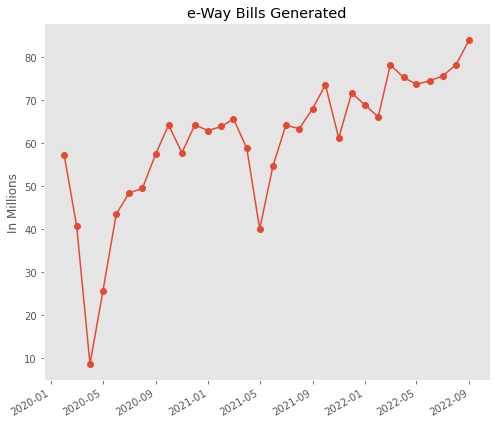

In [7]:
gst[gst.columns[0]].plot(kind='line', marker='o', figsize=(7,6), x_compat=True)
plt.title('e-Way Bills Generated', color='black')
plt.ylabel('In Millions')
# plt.xlabel('Data as on 6 Sep, 2020')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\e-way bills', dpi=150, bbox_inches='tight')


In [8]:
gst.to_csv(data_output_dir+"\\gst_eway.csv")

# Truck

In [9]:
truck = pd.read_excel(excel_path, sheet_name="truck",index_col=0, parse_dates=True)

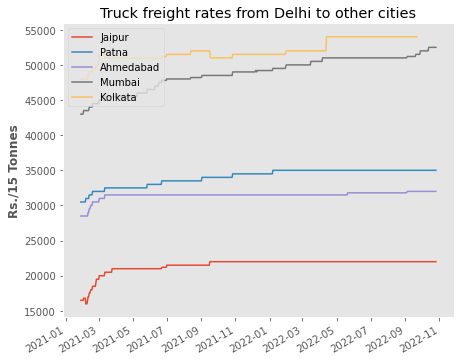

In [10]:
truck['Jaipur'].plot(label='Jaipur')
truck['Patna '].plot(label='Patna')
truck['Ahmedabad '].plot(label='Ahmedabad')
truck['Mumbai '].plot(label='Mumbai')
# truck['Chennai '].plot(label='Chennai')
truck['Kolkata '].plot(label='Kolkata', figsize=(7,6))
plt.legend(loc='upper left')
plt.grid(visible=False)
plt.title('Truck freight rates from Delhi to other cities')
plt.xlabel('')
plt.ylabel('Rs./15 Tonnes', fontweight= 'bold')

plt.savefig(plot_output_dir+'\\truck.png', dpi=300, bbox_inches='tight')



# Energy Consumption

In [11]:
elec = pd.read_excel(excel_path, sheet_name="electricity",index_col=0, parse_dates=True)

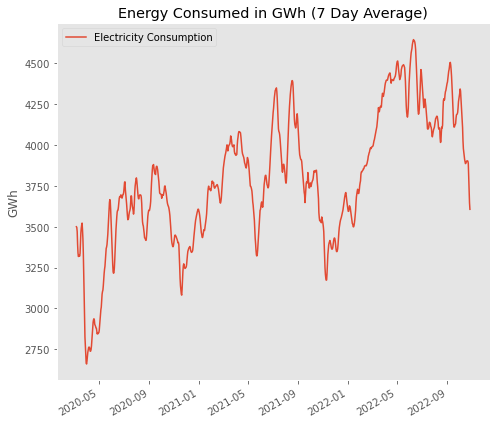

In [12]:
elec['2020-03-01':].rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('GWh')
# plt.grid(b=True, linewidth=0.4)
plt.title('Energy Consumed in GWh (7 Day Average)')
plt.legend()
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\elec.png', dpi=300)


# UPI

In [13]:
upi = pd.read_excel(excel_path, sheet_name="upi",index_col=0, parse_dates=True)

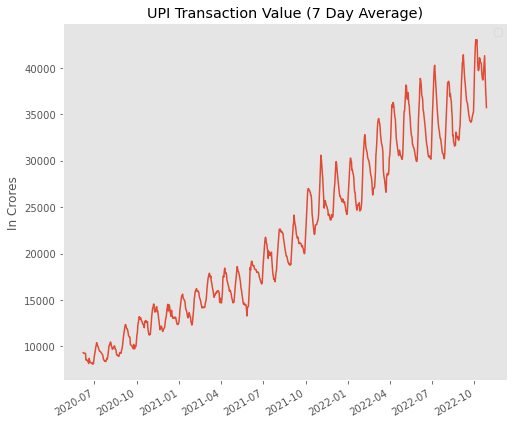

In [14]:
upi.rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.title("UPI Transaction Value (7 Day Average)")
plt.legend("")
plt.xlabel("")

plt.tight_layout()

plt.ylabel('In Crores')

plt.grid(visible=False)

plt.savefig(plot_output_dir+'\\upi_val.png', dpi=150, bbox_inches='tight')


# Unemployment


## Daily

In [15]:
unemp_daily = pd.read_excel(excel_path, sheet_name="unemp-daily",index_col=0, parse_dates=True)

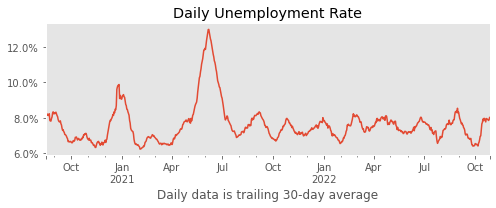

In [16]:
# ax=unemp_daily.plot(secondary_y='Labour   participation rate  (LPR) ')

ax = unemp_daily['UER'].plot(figsize=(7,3), kind='line')

plt.xlabel("Daily data is trailing 30-day average")
plt.title('Daily Unemployment Rate')

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()

plt.savefig(plot_output_dir+'\\unemp.png', dpi=300, bbox_inches='tight')


In [17]:
unemp_daily.tail(5)

,UER
Day,
2022-10-23,7.92
2022-10-24,7.90
2022-10-25,7.85
2022-10-26,7.89
2022-10-27,8.02


## Weekly

In [18]:
unemp_weekly = pd.read_excel(excel_path, sheet_name="unemp-weekly",index_col=0, parse_dates=True)

In [19]:
unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]

C:\Users\ADVAIT~1\AppData\Local\Temp/ipykernel_556/2232539766.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]


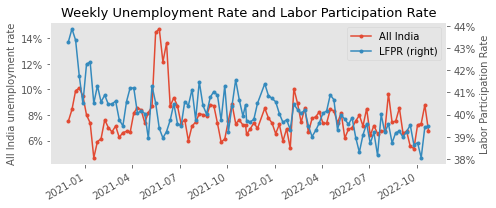

In [20]:
ax = unemp_weekly.plot(figsize=(7,3), x_compat=True, secondary_y=['LFPR'], marker='.')

ax.set_xlabel("")
plt.title('Weekly Unemployment Rate and Labor Participation Rate', fontsize=13)

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.right_ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_ylabel("All India unemployment rate", fontsize=10)
ax.right_ax.set_ylabel("Labor Participation Rate", fontsize=10)

plt.tight_layout()
plt.savefig(plot_output_dir+'\\weekly_unemp.png', dpi=300, bbox_inches='tight')


In [21]:
unemp_weekly.tail()

,All India,LFPR
Date,,
2022-09-25,5.38,38.63
2022-10-02,7.22,38.74
2022-10-09,7.32,38.06
2022-10-16,8.78,39.44
2022-10-23,6.78,39.49


# OAG Flight

## 2019

In [21]:
oag2019 = pd.read_excel(excel_path, sheet_name='oag_2019', index_col=0, parse_dates=True)

In [22]:
oag2019 = oag2019*100

In [23]:
oag2019.iloc[4]

Domestic         16.2
International   -15.3
Total             7.5
Name: South Asia, dtype: float64

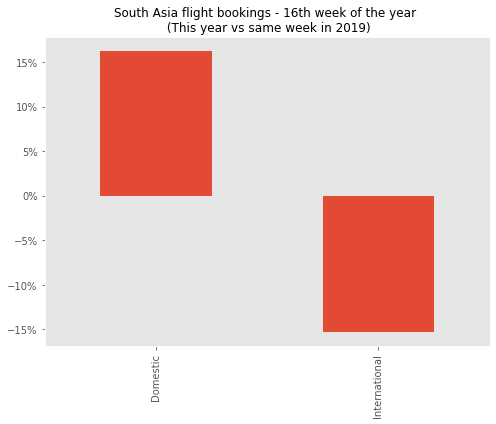

In [24]:
ax = oag2019.iloc[4,[0,1]].plot(kind='bar', figsize=(7,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# plt.title("South Asia flight bookings - this week vs same week in 2019")
plt.title("South Asia flight bookings - 16th week of the year \n (This year vs same week in 2019)", fontsize=12)

plt.grid(False)

plt.tight_layout()

plt.savefig(plot_output_dir+'\\oag_2019.png', dpi=300, bbox_inches='tight')

## Flight Footfall (CEIC)

In [22]:
foot_fall = pd.read_excel(excel_path, sheet_name='footfall', index_col=0, parse_dates=True)

In [23]:
foot_fall= foot_fall
foot_fall_7d= foot_fall.rolling(7).mean().dropna()
foot_fall_7d.tail()

,Daily Passenger Footfall
Date,
2022-10-23,734813.000000
2022-10-24,708587.857143
2022-10-25,700805.571429
2022-10-26,707156.428571
2022-10-27,710117.285714


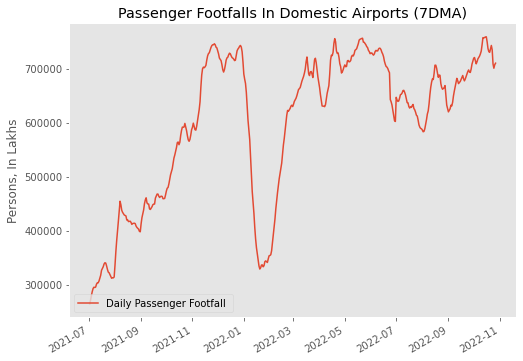

In [24]:
foot_fall_7d.plot(figsize=(8,6), x_compat=True)


plt.xlabel('')
plt.ylabel('Persons, In Lakhs')
# plt.ylabel('YoY Change in %')
plt.title('Passenger Footfalls In Domestic Airports (7DMA)')
plt.grid(visible=False)
# plt.show()
plt.legend(loc='lower left')
plt.savefig(plot_output_dir+'\\DailyFootfalls.png', dpi=500, bbox_inches='tight')

In [25]:
foot_fall_7d.tail()


,Daily Passenger Footfall
Date,
2022-10-23,734813.000000
2022-10-24,708587.857143
2022-10-25,700805.571429
2022-10-26,707156.428571
2022-10-27,710117.285714


# Flight Movements (CEIC)(INT'L and DOMESTIC)

In [26]:
flight_mvmt = pd.read_excel(excel_path, sheet_name='flightmovements', index_col=0, parse_dates=True)

In [27]:
flight_mvmt_7d= flight_mvmt.rolling(7).mean().dropna()
#flight_mvmt_7d_df = pd.DataFrame([['Domestic Flight Movements', 'International Flight Movements']], columns=['Domestic Flight Movements','International Flight Movements'])
flight_mvmt_7d.tail()

,Domestic Flight Movements,International Flight Movements
Date,,
2022-10-23,5388.857143,905.571429
2022-10-24,5351.142857,896.285714
2022-10-25,5358.142857,892.857143
2022-10-26,5402.000000,893.571429
2022-10-27,5429.285714,893.857143


In [28]:
# ax = flight_mvmt_7d_df['Domestic Flight Movements','International Flight Movements'].plot(figsize=(8,6), x_compat=True, secondary_y=True)
# #ax2= flight_mvmt_7d['Domestic Flight Movements'].plot(figsize=(8,6), x_compat=True)

# ax2 = ax.twinx()
# ax.plot(color = 'g')
# ax2.plot(color = 'b')

# plt.xlabel('Movements= Arrival Flights+ Departure Flights', labelpad=10)


# ax.set_ylabel('Domestic Flights')
# ax2.set_ylabel('International Flights')
# # plt.ylabel('YoY Change in %')
# plt.title('Flight Movements, India (7DMA)')
# plt.grid(visible=False)
# # plt.show()
# plt.legend(loc='right')
# plt.savefig(plot_output_dir+'\\flightmovements.png', dpi=500, bbox_inches='tight')

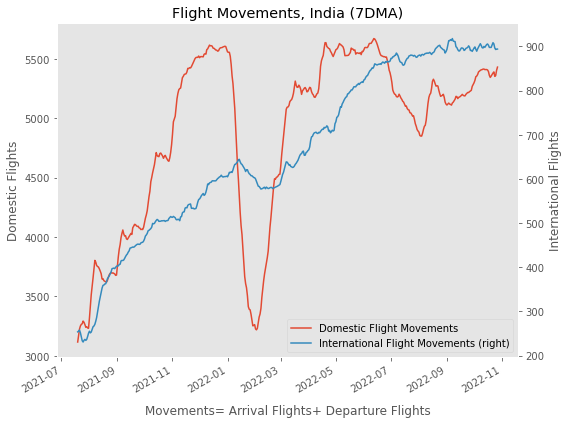

In [29]:
ax=flight_mvmt_7d.plot(kind='line', y='Domestic Flight Movements', figsize=(8,6), x_compat=True)

ax2=flight_mvmt_7d.plot(kind='line', y='International Flight Movements', secondary_y=True, ax=ax, x_compat=True)

ax.set_ylabel('Domestic Flights')
ax2.set_ylabel('International Flights')
ax.set_xlabel('Movements= Arrival Flights+ Departure Flights', labelpad=10)
plt.title('Flight Movements, India (7DMA)')

plt.grid(visible=False)
#plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\flightmovements.png', dpi=500, bbox_inches='tight')

plt.show()

# MONSOON KHARIF


In [27]:
kharif = pd.read_excel(excel_path, sheet_name="Kharif",index_col=0, parse_dates=True, header=1)

In [28]:
kharif

,2018,2019,2020,2021,2022
Agricultural Products,95.26,95.44,104.48,103.65,101.64


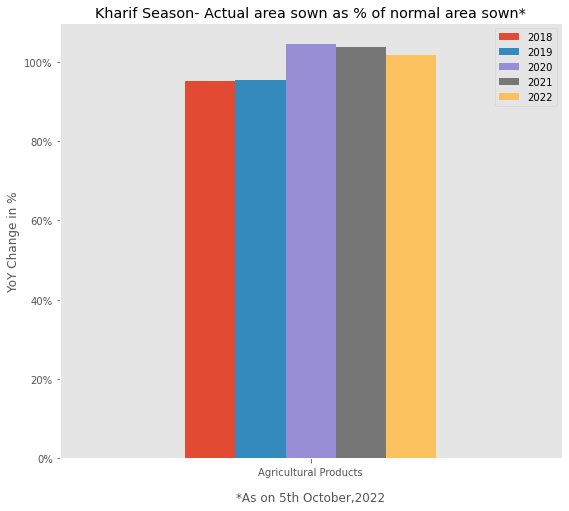

In [30]:

ax= (kharif[kharif.columns[0:7]]/100).plot(kind="bar", figsize=(9, 8))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel('*As on 5th October,2022', labelpad=14)
plt.ylabel('YoY Change in %')
plt.title('Kharif Season- Actual area sown as % of normal area sown*')
ax.tick_params(axis="x", labelrotation=0,size=5)
plt.grid(visible=False)
plt.axhline(y=0, color='black', linestyle='-',lw=.5)
# plt.show()
plt.legend(loc='upper right')
plt.savefig(plot_output_dir+'\\Kharif actual area sown.png', dpi=300, bbox_inches='tight')

# Consumer Sentiment

In [30]:
sent = pd.read_excel(excel_path, sheet_name="sentiment",index_col=0, parse_dates=True, header=1)

In [31]:
sent.rename(columns={"Consumer Sentiment Indices (CMIE-Umich)": "Date"}, inplace=True)
sent.columns = (['Index of Consumer Sentiments-All India ', 'Index of Consumer Sentiments-Urban ',
       'Index of Consumer Sentiments-Rural ', 'Index of Consumer Expectations-All India ',
       'Index of Consumer Expectations-Urban ', 'Index of Consumer Expectations-Rural ',
       'Index of Current Economic Conditions-All India ',
       'Index of Current Economic Conditions-Urban ',
       'Index of Current Economic Conditions-Rural '])

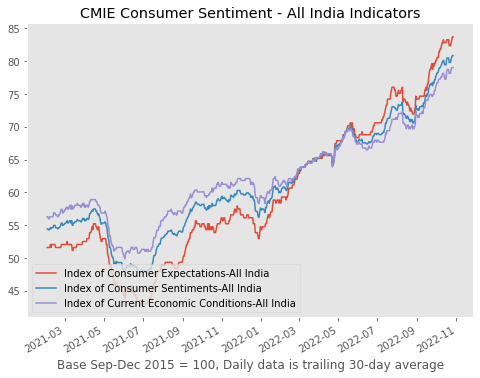

In [33]:
#All India plots
sent['Index of Consumer Expectations-All India '].plot(label='Index of Consumer Expectations-All India ')
sent['Index of Consumer Sentiments-All India '].plot(label='Index of Consumer Sentiments-All India')
sent['Index of Current Economic Conditions-All India '].plot(label='Index of Current Economic Conditions-All India', figsize=(8,6))

plt.xlabel("Base Sep-Dec 2015 = 100, Daily data is trailing 30-day average")
# plt.ylabel('YoY Change in %')
#plt.xlabel("Daily data is trailing 30-day average")
plt.title('CMIE Consumer Sentiment - All India Indicators')
plt.grid(visible=False)
# plt.show()
plt.legend(loc='lower left')
plt.savefig(plot_output_dir+'\\All India Indicators.png', dpi=200, bbox_inches='tight')



In [34]:
sent.tail()

,Index of Consumer Sentiments-All India,Index of Consumer Sentiments-Urban,Index of Consumer Sentiments-Rural,Index of Consumer Expectations-All India,Index of Consumer Expectations-Urban,Index of Consumer Expectations-Rural,Index of Current Economic Conditions-All India,Index of Current Economic Conditions-Urban,Index of Current Economic Conditions-Rural
,,,,,,,,,
2022-10-23,79.79,78.67,80.47,82.35,80.33,83.10,78.13,77.56,78.81
2022-10-24,80.32,78.83,80.66,82.81,80.75,83.57,78.72,77.56,78.81
2022-10-25,80.67,79.33,81.02,83.26,81.17,84.04,79.01,78.12,79.10
2022-10-26,80.85,79.67,81.20,83.71,81.59,84.04,79.01,78.39,79.40
2022-10-27,80.85,79.50,81.39,83.71,81.17,84.51,79.01,78.39,79.40


# PMI

In [35]:
pmi = pd.read_excel(excel_path, sheet_name="pmi",index_col=0, parse_dates=True)

In [36]:
pmi

,IHS Markit India manufacturing PMI,IHS Markit India services PMI,IHS Markit India composite PMI
Month,,,
2015-10-01,50.7,53.2,NaN
2015-11-01,50.3,50.1,NaN
2015-12-01,49.1,53.6,NaN
2016-01-01,51.1,54.3,NaN
2016-02-01,51.1,51.4,NaN
...,...,...,...
2022-05-01,54.6,58.9,58.3
2022-06-01,53.9,59.2,58.2
2022-07-01,56.4,55.5,56.6


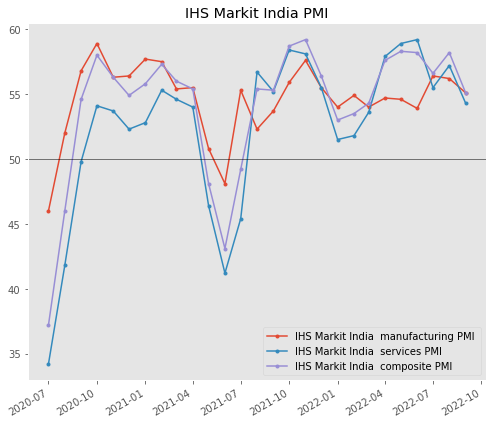

In [44]:
from turtle import color


pmi.iloc[57:].plot(marker='.', figsize=(7,6), x_compat=True)
plt.xlabel("")
plt.title('IHS Markit India PMI')
plt.tight_layout()
plt.grid(visible=False)
plt.axhline(y=50,color='black',lw='.5')
plt.savefig(plot_output_dir+'\\pmi.png', dpi=250)

plt.show()

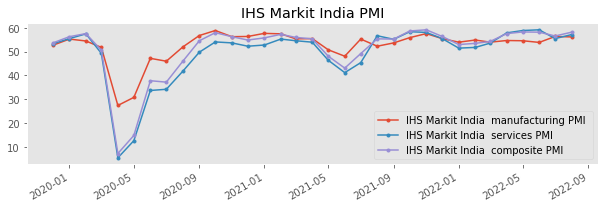

In [40]:
pmi.iloc[50:].plot(marker='.', figsize=(8.5,3), x_compat=True)
plt.xlabel("")
plt.title('IHS Markit India PMI')
plt.tight_layout()
plt.grid(visible=False)

#plt.savefig(plot_output_dir+'\\pmicow.png', dpi=150)

plt.show()

# Vehicles

In [38]:
vehicle = pd.read_excel(excel_path, sheet_name="vehicles",index_col=0, parse_dates=True)

In [39]:
vehicle.rename(columns={
    "Transportation  vehicles ": "Commercial Vehicles",
    "Non-transportation  vehicles ": "Passenger Vehicles"
}, inplace=True)

In [40]:
vehicle = vehicle.iloc[-30:]
vehicle.index = pd.to_datetime(vehicle.index).to_period('M')

In [41]:
vehicle = vehicle/100000

In [42]:
vehicle.tail()

,Total vehicles,Commercial Vehicles,Passenger Vehicles
2022-05,15.79655,1.16277,14.63378
2022-06,14.54576,1.23358,13.31218
2022-07,13.72657,1.27185,12.45472
2022-08,14.77641,1.32746,13.44895
2022-09,14.15616,1.42251,12.73365


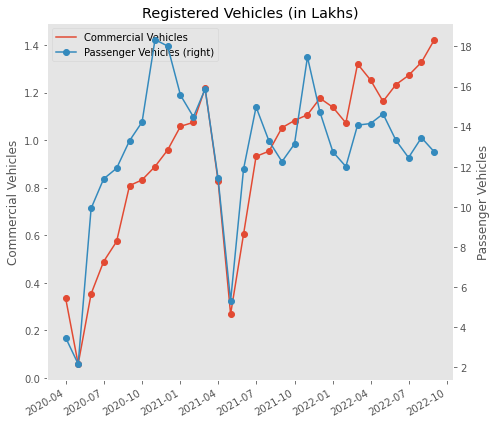

In [43]:
ax=vehicle.plot(kind='line', y='Commercial Vehicles', figsize=(7,6), marker='o', x_compat=True)

ax2=vehicle.plot(kind='line', y='Passenger Vehicles', secondary_y=True, ax=ax, marker='o', x_compat=True)

ax.set_ylabel('Commercial Vehicles')
ax2.set_ylabel('Passenger Vehicles')

plt.title('Registered Vehicles (in Lakhs)')

plt.grid(visible=False)

plt.tight_layout()
plt.savefig(plot_output_dir+'\\registered_vehicles.png', dpi=300, bbox_inches='tight')

plt.show()

# FasTag

In [45]:
fastag = pd.read_excel(excel_path, sheet_name="fastag",index_col=0, parse_dates=True)

C:\Users\ADVAIT~1\AppData\Local\Temp/ipykernel_556/1931119964.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fastag['Amount (In Cr)']['2020-01-01':].iloc[0:].plot(kind='line', alpha=0.8, marker='o', figsize=(7,6), x_compat=True)


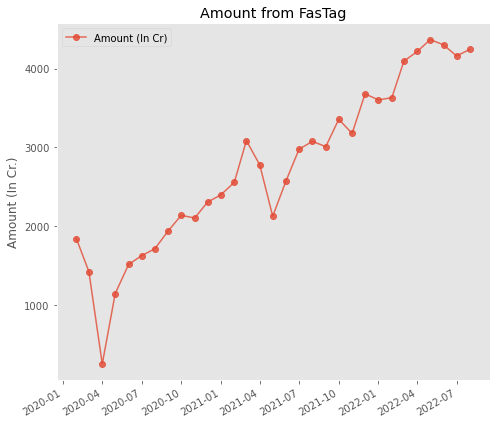

In [46]:
fastag['Amount (In Cr)']['2020-01-01':].iloc[0:].plot(kind='line', alpha=0.8, marker='o', figsize=(7,6), x_compat=True)
plt.legend()
plt.xlabel('')
plt.ylabel('Amount (In Cr.)')
plt.grid(visible=False)
plt.title('Amount from FasTag')
plt.tight_layout()

plt.savefig(plot_output_dir+'\\amt fastag 2020.png', dpi=150, bbox_inches='tight')

plt.show()



In [47]:
fastag.head()

,No. of Banks Live on NETC,Tag Issuance (In Nos.),Volume (In Mn),Amount (In Cr)
Month,,,,
2022-08-01,NaN,NaN,NaN,4245.00
2022-07-01,NaN,NaN,NaN,4162.00
2022-06-01,NaN,NaN,NaN,4303.00
2022-05-01,36.0,52856885,285.37,4369.36
2022-04-01,36.0,51189695,265.98,4218.89


# Fuel Consumption

In [48]:
fuel = pd.read_excel(excel_path, sheet_name="fuel-cons",index_col=0, parse_dates=True)

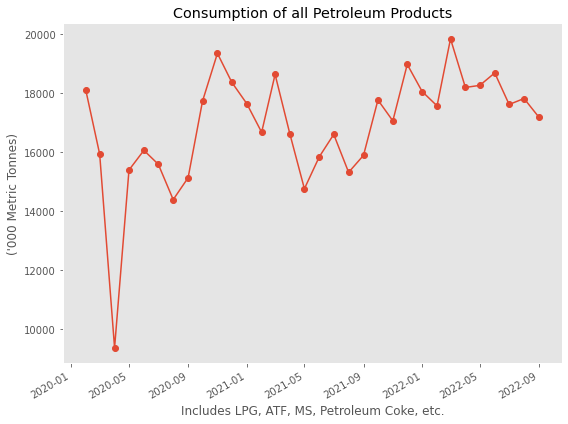

In [49]:
fuel['TOTAL']['2020-01-02':].iloc[0:].plot(marker='o', figsize=(8,6), x_compat=True)
plt.xlabel('Includes LPG, ATF, MS, Petroleum Coke, etc.')
plt.ylabel("('000 Metric Tonnes)")
plt.title('Consumption of all Petroleum Products')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\petrol_consump', dpi=300, bbox_inches='tight')


In [50]:
fuel[::].pct_change()*100

,TOTAL
Date,
2019-04-01,NaN
2019-05-01,4.774110
2019-06-01,-8.001668
2019-07-01,1.751917
2019-08-01,-4.773491
2019-09-01,-5.492431
2019-10-01,7.131280
2019-11-01,6.740143
2019-12-01,2.339173


# Monthly

In [51]:
monthly = pd.read_excel(excel_path, sheet_name="monthly-indicators",index_col=0, parse_dates=True)

In [52]:
monthly.tail()

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2022-05-01,9729,9445,131700,63243.6,39068.6,65883.0,1712560.0,3109450.0,23606,15195
2022-06-01,9710,9258,125500,66348.1,42375.6,65863.0,2469670.0,3621370.0,25292,15767
2022-07-01,9656,9171,122140,66253.6,36274.8,63386.0,2189720.0,1788340.0,23265,13929
2022-08-01,9736,9308,119330,61681.3,33000.7,62542.0,1511280.0,2632810.0,25416,15080
2022-09-01,9650,9406,115690,64024.1,36931.0,NaN,NaN,NaN,25650,15100


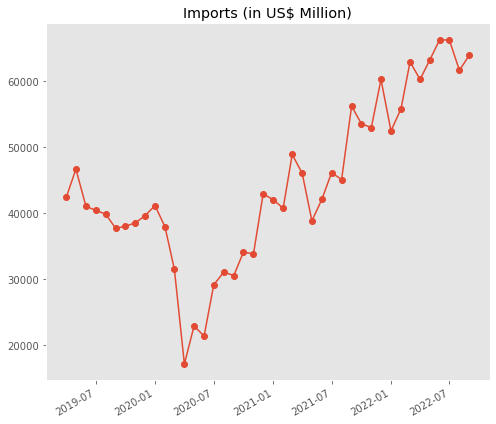

In [53]:
monthly['Imports'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Imports (in US$ Million)')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\imports.png', dpi=300, bbox_inches='tight')




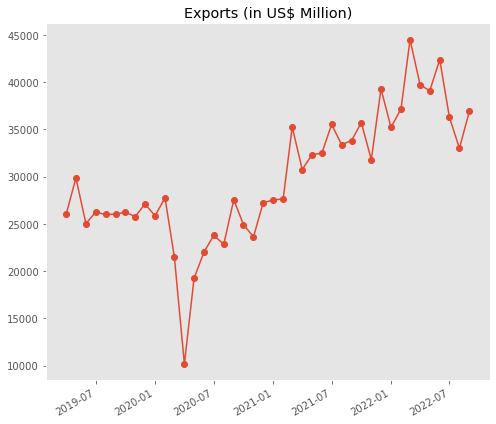

In [54]:
monthly['Exports'].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Exports (in US$ Million)')
plt.grid(b=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\exports.png', dpi=300, bbox_inches='tight')

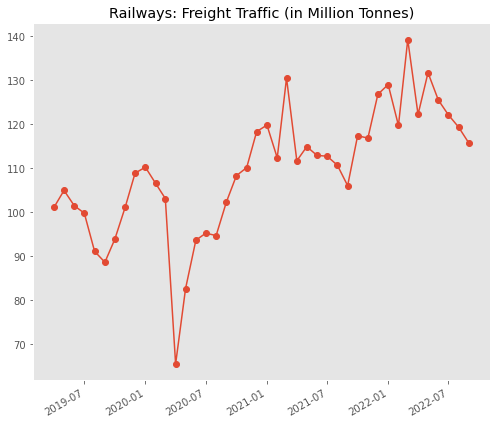

In [55]:

(monthly['Railways: freight traffic']/1000).plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Railways: Freight Traffic (in Million Tonnes)')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\rail.png', dpi=300, bbox_inches='tight')


In [56]:
monthly[::].pct_change().tail(5)*100

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2022-05-01,4.053476,4.376174,7.774141,4.878461,-1.675874,1.420874,-26.267297,13.141262,4.479065,8.134073
2022-06-01,-0.195292,-1.979884,-4.707669,4.908797,8.464598,-0.030357,44.209254,16.463362,7.142252,3.764396
2022-07-01,-0.556128,-0.939728,-2.677291,-0.142431,-14.396964,-3.760837,-11.335523,-50.617032,-8.014392,-11.657259
2022-08-01,0.828500,1.493839,-2.300639,-6.901210,-9.025825,-1.331524,-30.982957,47.220886,9.245648,8.263335
2022-09-01,-0.883320,1.052858,-3.050365,3.798234,11.909747,0.000000,0.000000,0.000000,0.920680,0.132626


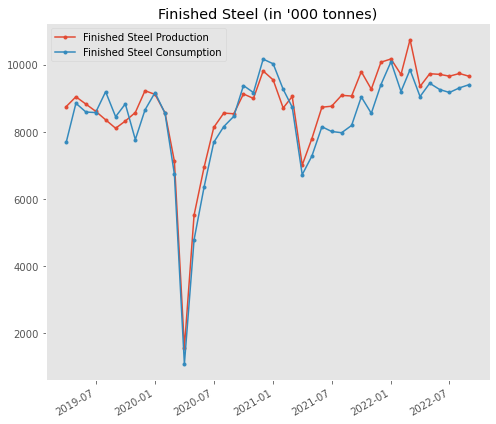

In [57]:
monthly.iloc[:,[0,1]].plot(marker='.', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title("Finished Steel (in '000 tonnes)")
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\steel.png', dpi=300, bbox_inches='tight')




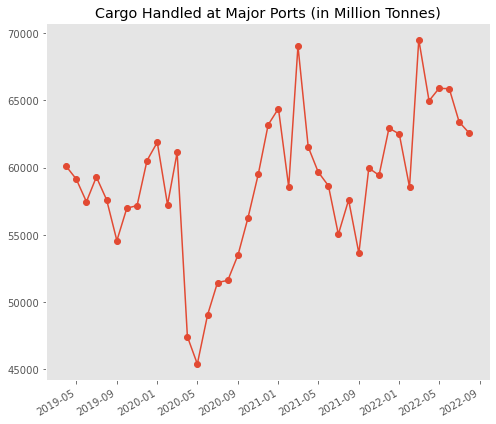

In [58]:

monthly['Port Volume'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Cargo Handled at Major Ports (in Million Tonnes)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\cargo.png', dpi=300, bbox_inches='tight')



In [59]:
monthly['Port Volume']

2019-04-01    60087.0
2019-05-01    59151.0
2019-06-01    57459.0
2019-07-01    59300.0
2019-08-01    57603.0
2019-09-01    54567.0
2019-10-01    56978.0
2019-11-01    57172.0
2019-12-01    60520.0
2020-01-01    61872.0
2020-02-01    57233.0
2020-03-01    61120.0
2020-04-01    47432.0
2020-05-01    45398.0
2020-06-01    49052.0
2020-07-01    51454.0
2020-08-01    51611.0
2020-09-01    53511.0
2020-10-01    56258.0
2020-11-01    59491.0
2020-12-01    63175.0
2021-01-01    64383.0
2021-02-01    58566.0
2021-03-01    69030.0
2021-04-01    61528.0
2021-05-01    59675.0
2021-06-01    58646.0
2021-07-01    55038.0
2021-08-01    57589.0
2021-09-01    53628.0
2021-10-01    59956.0
2021-11-01    59428.0
2021-12-01    62930.0
2022-01-01    62492.0
2022-02-01    58550.0
2022-03-01    69508.0
2022-04-01    64960.0
2022-05-01    65883.0
2022-06-01    65863.0
2022-07-01    63386.0
2022-08-01    62542.0
2022-09-01        NaN
Name: Port Volume, dtype: float64

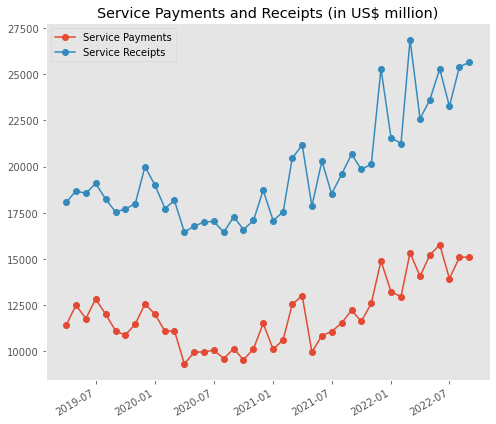

In [60]:
monthly[['Service Payments', 'Service Receipts']].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

plt.title('Service Payments and Receipts (in US$ million)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\service.png', dpi=300, bbox_inches='tight')




In [61]:
monthly.tail()

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2022-05-01,9729,9445,131700,63243.6,39068.6,65883.0,1712560.0,3109450.0,23606,15195
2022-06-01,9710,9258,125500,66348.1,42375.6,65863.0,2469670.0,3621370.0,25292,15767
2022-07-01,9656,9171,122140,66253.6,36274.8,63386.0,2189720.0,1788340.0,23265,13929
2022-08-01,9736,9308,119330,61681.3,33000.7,62542.0,1511280.0,2632810.0,25416,15080
2022-09-01,9650,9406,115690,64024.1,36931.0,NaN,NaN,NaN,25650,15100


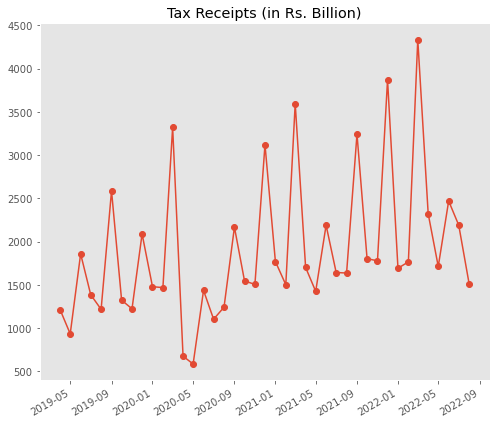

In [62]:
(monthly['Tax Receipts']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Tax Receipts (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\taxreceipt.png', dpi=300, bbox_inches='tight')




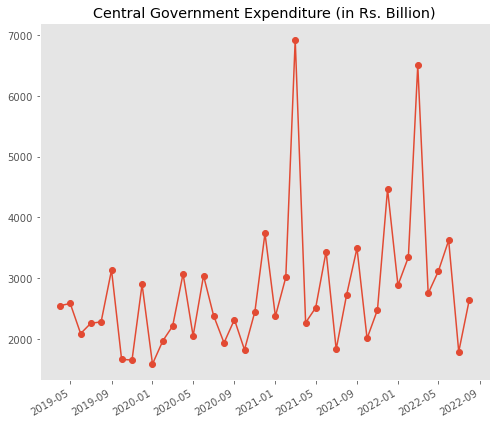

In [59]:
(monthly['Central Government Expenditure']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Central Government Expenditure (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\govtexpenditure.png', dpi=300, bbox_inches='tight')




# Money

In [63]:
money = pd.read_excel(excel_path, sheet_name="money",index_col=0, parse_dates=True)

In [64]:
money

,M3,public
Date,,
2019-09-13,10.08,12.73
2019-09-27,9.65,13.36
2019-10-11,10.01,13.54
2019-10-25,10.60,15.29
2019-11-08,9.93,12.24
...,...,...
2022-08-12,8.40,8.34
2022-08-26,8.90,8.18
2022-09-09,8.89,8.04


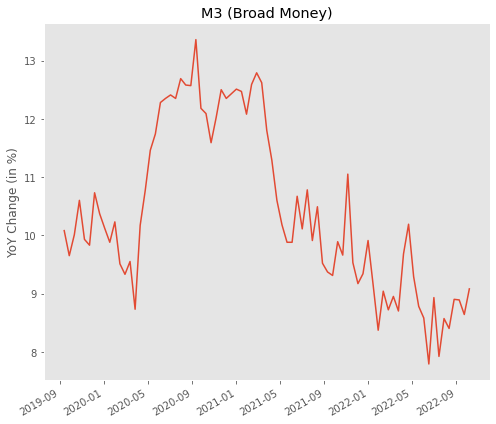

In [65]:
money['M3'].plot(figsize=(7,6), x_compat=True)
plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('M3 (Broad Money)')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\m3.png', dpi=150, bbox_inches='tight')

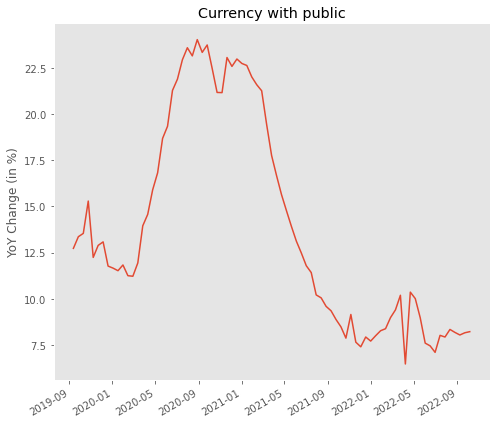

In [66]:
money['public'].plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('Currency with public')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\public_currency.png', dpi=300, bbox_inches='tight')



# Forex

In [71]:
forex = pd.read_excel(excel_path, sheet_name="forex", index_col=0, parse_dates=True)

In [72]:
forex.tail()

,Forex Reserves
Date,
2022-09-23,537518.0
2022-09-30,532664.0
2022-10-07,532868.0
2022-10-14,528367.0
2022-10-21,524520.0


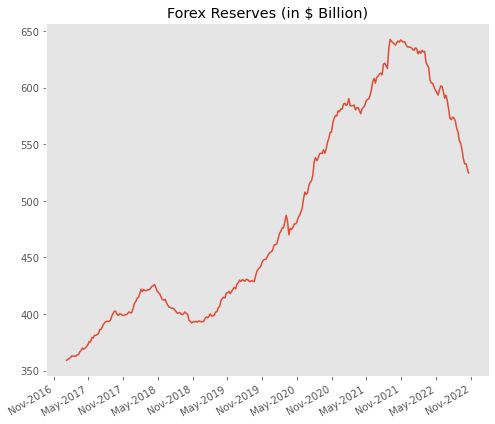

In [73]:
ax=(forex/1000)['Forex Reserves'].plot(figsize=(7,6), x_compat=True)
# plt.ylabel('in Billions of Rs.')

ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
    
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.title('Forex Reserves (in $ Billion)')
plt.xlabel("")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\forex.png', dpi=300, bbox_inches='tight')



In [74]:
bank = pd.read_excel(excel_path, sheet_name='banking', index_col=0, parse_dates=True)

In [75]:
bank

,Deposits,Credit
Date,,
2018-07-06,8.36,12.74
2018-07-20,8.15,12.40
2018-08-03,8.16,12.61
2018-08-17,8.31,12.92
2018-08-31,8.89,13.38
...,...,...
2022-08-12,8.84,14.11
2022-08-26,9.52,14.32
2022-09-09,9.51,16.18


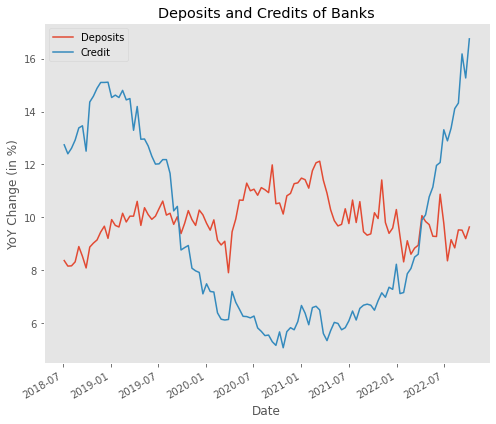

In [76]:
bank.plot(figsize=(7,6), x_compat=True)

plt.ylabel('YoY Change (in %)')
plt.title('Deposits and Credits of Banks')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\banks.png', dpi=400, bbox_inches='tight')


# COVID

## Active - MOHFW

In [77]:
active = pd.read_excel(excel_path, sheet_name='covid-active', index_col=0, usecols=[0,1])

In [78]:
active['Active Cases Total']

Name of State / UT
Andaman and Nicobar Islands                    2
Andhra Pradesh                               133
Arunachal Pradesh                              3
Assam                                       2613
Bihar                                        133
Chandigarh                                     9
Chhattisgarh                                 141
Dadra and Nagar Haveli and Daman and Diu       1
Delhi                                        351
Goa                                           76
Gujarat                                      472
Haryana                                      183
Himachal Pradesh                              23
Jammu and Kashmir                             27
Jharkhand                                     55
Karnataka                                   1915
Kerala                                      3454
Ladakh                                         9
Lakshadweep                                    0
Madhya Pradesh                                74
M

In [79]:
print(active.sum()[0])

16806


In [80]:
active.loc["India"] = active.sum()[0]

In [81]:
active = active.sort_values(by='Active Cases Total', ascending=False)
#active = active/1000
active.head()

,Active Cases Total
Name of State / UT,
India,16806
Kerala,3454
Assam,2613
Tamil Nadu,2328
Karnataka,1915


In [82]:
3.5/16.8

0.20833333333333331

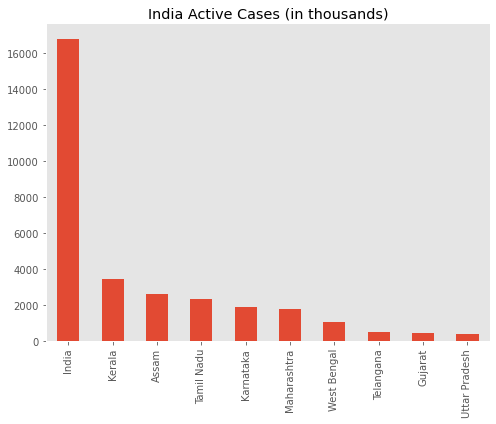

In [83]:
active[:10].plot(kind='bar', figsize=(7,6), legend=False)

plt.xlabel("")
plt.title("India Active Cases (in thousands)")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+"\\state.png",dpi=300)



# Vaccination - COWIN

In [84]:
vacc = pd.read_excel(excel_path, sheet_name='cowin-state', index_col=0)

In [85]:
vacc['Partially Vaccinated'] = vacc['partial_vaccinated']/vacc['Population']
vacc['Fully Vaccinated'] = vacc['totally_vaccinated']/vacc['Population']
vacc['Vaccinated with precaution dose'] = vacc['Precaution Dose']/vacc['Population']

In [86]:
vacc["Fully Vaccinated"].sort_values()

State
Lakshadweep          0.209015
Meghalaya            0.322589
Nagaland             0.330570
Manipur              0.431291
Jharkhand            0.456876
Arunachal Pradesh    0.520800
Bihar                0.542688
Mizoram              0.603402
Tripura              0.604093
Puducherry           0.610132
Assam                0.620351
Maharashtra          0.621096
Rajasthan            0.626736
West Bengal          0.669178
Ladakh               0.680809
Chhattisgarh         0.689053
Madhya Pradesh       0.693458
Punjab               0.695167
Haryana              0.702620
Kerala               0.707152
Uttar Pradesh        0.709332
Odisha               0.711746
Tamil Nadu           0.733231
Uttarakhand          0.774677
Sikkim               0.803312
Goa                  0.816245
Karnataka            0.817457
Telangana            0.818170
Delhi                0.838954
Gujarat              0.845122
A & N Islands        0.846534
Himachal Pr.         0.846967
Chandigarh           0.849758
J&K 

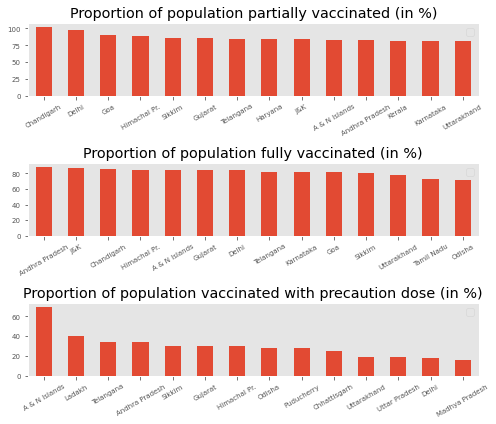

In [87]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

ax = ((vacc['Partially Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[0], rot=30)
ax.set_title("Proportion of population partially vaccinated (in %)")
plt.tight_layout()
ax.legend("")
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax.set_xlabel("")


ax2 = ((vacc['Fully Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[1], rot=30)
ax2.set_title("Proportion of population fully vaccinated (in %)")
plt.tight_layout()
ax2.legend("")
ax2.grid(False)
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax2.set_xlabel("")

ax3 = ((vacc['Vaccinated with precaution dose'].sort_values(ascending=False).iloc[0:14])*100).plot(kind='bar', ax=axes[2], rot=30)
ax3.set_title("Proportion of population vaccinated with precaution dose (in %)")
plt.tight_layout()
ax3.legend("")
ax3.grid(False)
ax3.tick_params(axis='both', which='major', labelsize=7)
ax3.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax3.set_xlabel("")

plt.tight_layout()

plt.savefig(plot_output_dir+"\\vaccines_india.png", dpi=300)




## age wise PIB

In [88]:
age = pd.read_excel(excel_path, sheet_name="age-pib", index_col=0, usecols=[0,1,2,3])

In [89]:
age = age/10000000

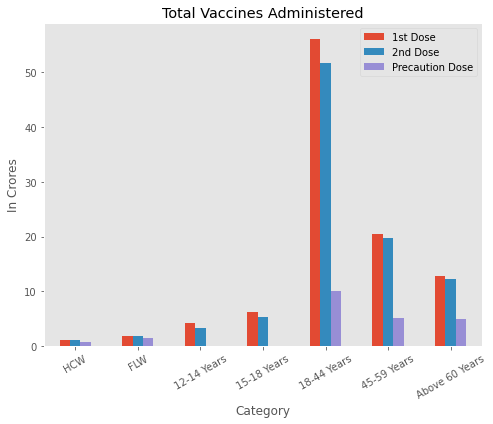

In [90]:
age.plot(kind='bar', rot=0, figsize=(7,6))

# plt.xlabel("\n *45-60 year old with co-morbidities")

plt.ylabel("In Crores")
plt.xticks(rotation=30)
plt.title("Total Vaccines Administered")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\age_pib.png', dpi=300)
